From https://helloworld.co.in/article/ai-robot-human-following-robot-using-tensorflow-lite-raspberry-pi

```
git clone https://github.com/jiteshsaini/robotics-level-4
cp robotics-level-4/earthrover/human_following/common.py .
```

Pour la caméra: https://www.pyimagesearch.com/2015/03/30/accessing-the-raspberry-pi-camera-with-opencv-and-python/




In [18]:
import cv2
import matplotlib.pyplot as plt

import common as cm
#OpenCV object to access camera
#cap = cv2.VideoCapture(0)

In [2]:
from picamera.array import PiRGBArray
from picamera import PiCamera
import time
import cv2
# initialize the camera and grab a reference to the raw camera capture
camera = PiCamera()


In [15]:
start_time=time.time()
rawCapture = PiRGBArray(camera)
camera.capture(rawCapture, format="bgr")
image = rawCapture.array
print(time.time()-start_time)

0.3710198402404785


## Continuous capture

In [10]:
# initialize the camera and grab a reference to the raw camera capture
#camera = PiCamera()
camera.resolution = (224, 224)
camera.framerate = 32
rawCapture = PiRGBArray(camera, size=(224, 224))
# allow the camera to warmup
time.sleep(0.1)
# capture frames from the camera
new_time=0
for frame in camera.capture_continuous(rawCapture, format="bgr", use_video_port=True):
    # grab the raw NumPy array representing the image, then initialize the timestamp
    # and occupied/unoccupied text
    
    image = frame.array
    #print(time.time()-new_time)
    #new_time=time.time()
    #plt.imshow(image)
    # show the frame
    #cv2.imshow("Frame", image)
    #key = cv2.waitKey(1) & 0xFF
    # clear the stream in preparation for the next frame
    rawCapture.truncate(0)
    # if the `q` key was pressed, break from the loop
    #if key == ord("q"):
    #    break

1639039293.9391863
0.02448582649230957
0.03157758712768555
0.03121209144592285
0.028788089752197266
0.03365516662597656
0.02673935890197754
0.03437471389770508
0.029223918914794922
0.03432655334472656
0.030097246170043945
0.02910923957824707
0.03134417533874512
0.027627229690551758
0.032948970794677734
0.03829598426818848
0.024441003799438477
0.037157297134399414
0.025034666061401367
0.02994251251220703
0.03221416473388672
0.03069782257080078
0.03085184097290039
0.03251051902770996
0.027265071868896484
0.03458142280578613
0.030504465103149414
0.029564380645751953
0.029559612274169922
0.030428409576416016
0.03944993019104004
0.024807214736938477
0.029758214950561523
0.028797626495361328
0.03173041343688965
0.03381848335266113
0.032601118087768555
0.02675318717956543
0.031159162521362305
0.029428720474243164
0.034157514572143555
0.028078317642211914
0.0312647819519043
0.03444266319274902
0.030359983444213867
0.02899909019470215
0.030335426330566406
0.031100749969482422
0.0324203968048095

KeyboardInterrupt: 

0.09618186950683594
0.05930137634277344
0.030020952224731445
0.02815103530883789
0.02912163734436035
0.03393888473510742
0.03191637992858887
0.032024383544921875
0.03063178062438965
0.028196334838867188
0.029343366622924805
0.033357858657836914
0.03182077407836914
0.031244277954101562
0.02709794044494629
0.03138327598571777
0.033504486083984375
0.031876325607299805
0.03460121154785156
0.02598881721496582
0.029515743255615234
0.032982826232910156
0.028766870498657227
0.030349254608154297
0.030871152877807617
0.030887365341186523
0.03397870063781738
0.02731609344482422
0.031119585037231445
0.0299530029296875
0.03304266929626465
0.031853437423706055
0.028139591217041016
0.02982497215270996
0.031209945678710938
0.03233814239501953
0.03152322769165039
0.027744531631469727
0.031172752380371094
0.03364825248718262
0.029947996139526367
0.039382219314575195
0.030721426010131836
0.03012704849243164
0.024454355239868164
0.045368194580078125
0.02481222152709961
0.02105569839477539
0.03123140335083

PiCameraValueError: Incorrect buffer length for resolution 224x224

In [51]:


#threshold of prediction probability (or score). The model will consider an object detected if its score is above this value
threshold=0.2 

#keep the top 5 objects which cross the above threshold.
top_k=5 

#this is set to 1 if Coral hardware is used for running the model file.
edgetpu=1  

#path where the model file is located
model_dir = './robotics-level-4/all_models' 

#model file
model_edgetpu = 'mobilenet_ssd_v2_coco_quant_postprocess_edgetpu.tflite' 
#model_edgetpu = 'mobilenet_ssd_v2_coco_quant_postprocess.tflite' 

#label file corresponding to the model file
lbl = 'coco_labels.txt' 

# distance from center of frame on both sides. The object being tracked must be brought inside this zone while tracking
tolerance=0.1

# deviation of the center of object from center of frame
x_deviation=0 

# Y coordinate of the bottom edge of the bounding box
y_max=0 

# This is the name of the object which is required to be tracked by the code
object_to_track='person'

In [52]:
interpreter, labels = cm.load_model(model_dir,model_edgetpu,lbl,edgetpu)

Loading from directory: ./robotics-level-4/all_models 
Loading Model: mobilenet_ssd_v2_coco_quant_postprocess_edgetpu.tflite 
Loading Labels: coco_labels.txt 


In [53]:
from PIL import Image

pil_im = Image.fromarray(image).convert('RGB')

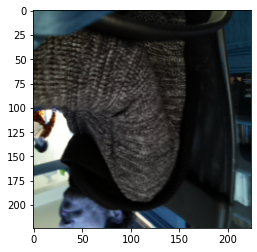

In [54]:
plt.imshow(pil_im)

In [57]:
start_time=time.time()
cm.set_input(interpreter, pil_im)
interpreter.invoke()
objs = cm.get_output(interpreter, score_threshold=threshold, top_k=top_k)
print(time.time()-start_time)

0.07832551002502441


In [31]:
objs

[Object(id=61, score=0.2109375, bbox=BBox(xmin=0.10273978114128113, ymin=0.5324016809463501, xmax=0.8434063196182251, ymax=1.0)),
 Object(id=0, score=0.2109375, bbox=BBox(xmin=0.0, ymin=0.006231725215911865, xmax=0.9611335396766663, ymax=0.974336564540863))]